In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # 파일 오류 무시

In [153]:
df = pd.read_csv('../../data/sklearn_classification/RocketLaunchDataCSV.csv')
df.head(10)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,NaN,07-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,NaN,08-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN
5,NaN,01-Mar-59,NaN,Cape Canaveral,NaN,NaN,78.0,0.0,60.92,NaN,...,10.0,10.0,NaN,NaN,NaN,30.13,NaN,11:35,Cloudy,NaN
6,NaN,02-Mar-59,NaN,Cape Canaveral,NaN,NaN,82.0,0.0,65.12,NaN,...,13.0,10.0,NaN,NaN,NaN,30.19,NaN,11:37,Partly Cloudy,NaN
7,Pioneer 4,03-Mar-59,13:10,Cape Canaveral,Uncrewed,Y,78.0,0.0,69.65,78.0,...,20.0,7.0,12.0,NaN,NaN,30.13,NaN,11:38,Cloudy,NaN
8,NaN,04-Mar-59,NaN,Cape Canaveral,NaN,NaN,77.0,0.0,66.72,NaN,...,21.0,7.0,NaN,NaN,NaN,30.11,NaN,11:40,Cloudy,NaN
9,NaN,05-Mar-59,NaN,Cape Canaveral,NaN,NaN,81.0,67.0,72.63,NaN,...,17.0,10.0,NaN,NaN,NaN,30.12,NaN,11:42,Cloudy,NaN


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

In [155]:
# 버릴 커럶 선택(Name, Date, Time (East Coast), Location, Hist Ave Max Wind Speed, Notes, Hist Ave Sea Level Pressure, Sea Level Pressure, Hist Ave Visibility, Day Length)
df = df.drop(columns=['Name', 'Date', 'Time (East Coast)', 'Location', 'Hist Ave Max Wind Speed', 'Notes', 'Hist Ave Sea Level Pressure', 'Sea Level Pressure', 'Hist Ave Visibility', 'Day Length'],axis=1)
df

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.00,0.08,E,16.0,15.0,NaN,Cloudy
1,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.00,0.09,E,14.0,10.0,NaN,Cloudy
2,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.00,0.09,NE,15.0,10.0,11.0,Cloudy
3,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,0.00,0.08,N,10.0,10.0,NaN,Partly Cloudy
4,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,0.00,0.09,E,12.0,10.0,NaN,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,87.0,71.0,79.36,NaN,87.0,70.0,79.0,0.00,0.15,S,20.0,10.0,NaN,Thunder
296,NaN,NaN,86.0,72.0,79.50,NaN,88.0,70.0,79.0,0.01,0.16,SE,18.0,10.0,NaN,Fair
297,Crewed,Y,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,SE,16.0,10.0,7.0,Fair
298,NaN,NaN,87.0,72.0,79.70,NaN,88.0,70.0,79.0,0.46,0.16,E,13.0,10.0,NaN,Cloudy


In [156]:
df.isnull().sum()

Crewed or Uncrewed              240
Launched?                       240
High Temp                         1
Low Temp                          1
Ave Temp                          1
Temp at Launch Time             241
Hist High Temp                    1
Hist Low Temp                     1
Hist Ave Temp                     1
Percipitation at Launch Time      1
Hist Ave Percipitation            1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
Wind Speed at Launch Time       241
Condition                         2
dtype: int64

In [157]:
df.Condition.value_counts()

Condition
Cloudy            113
Partly Cloudy      68
Fair               68
Rain               24
T-Storm            12
Thunder             7
Mostly Cloudy       2
Windy               1
Partly Cloudly      1
Light Rain          1
Heavy T-Storm       1
Name: count, dtype: int64

In [158]:
df['Temp at Launch Time'].nunique()

31

<Axes: xlabel='Condition', ylabel='Temp at Launch Time'>

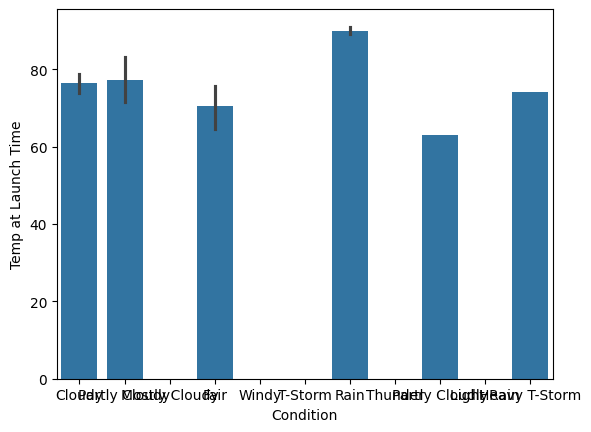

In [159]:
sns.barplot(x='Condition', y='Temp at Launch Time', data=df)

In [160]:
df['Wind Speed at Launch Time'].nunique()

18

<Axes: xlabel='Condition', ylabel='Temp at Launch Time'>

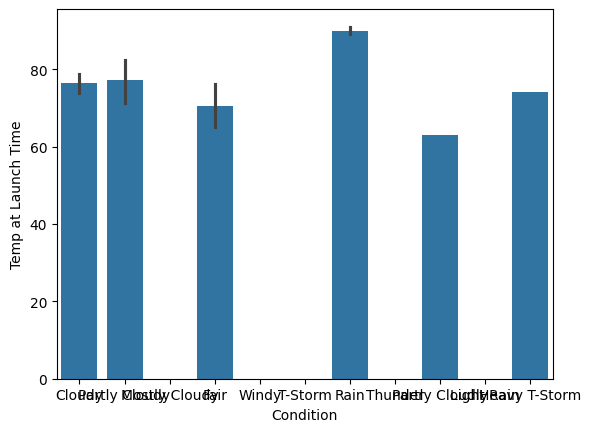

In [161]:
sns.barplot(x='Condition', y='Temp at Launch Time', data=df)

In [162]:
df['Percipitation at Launch Time'].unique()

array([0.  , 0.8 , 0.1 , 0.12, 0.05, 0.04, 0.2 , 0.15, 0.02, 0.03, 0.14,
       0.24, 0.4 , 0.5 , 0.08, 0.21, 0.11,  nan, 0.35, 0.3 , 0.16, 0.06,
       0.13, 1.8 , 1.2 , 0.6 , 1.68, 0.28, 0.01, 0.46])

In [163]:
df['Hist Ave Percipitation'].unique()

array([8.0e-02, 9.0e-02, 1.0e-01, 2.4e-01, 2.5e-01, 7.0e-02, 6.0e-02,
       1.6e-01, 1.5e-01, 8.0e-01, 2.1e-01, 2.0e-01, 1.2e-01, 1.1e-01,
       1.9e-01, 2.7e-01, 2.6e-01, 1.8e-01, 1.7e-01, 2.3e-01,     nan,
       1.3e-01, 1.4e-01, 8.1e+01])

In [164]:
df['Visibility'].unique()

array([15., 10.,  7., 20., 25.,  8., nan, 21., 80., 30.])

In [165]:
# 결측치 채우기unique()unique()

# crewed = Uncrewed로
# Launche? = N
# Wind Direction = Unknown
# Condition = Cloudy
# 기타는 중앙값 또는 최빈값
temp_median = df['Temp at Launch Time'].median()
wind_speed_median = df['Wind Speed at Launch Time'].median()
print('결측치 채우기 전 : ',df.isnull().sum())
df.fillna({'Crewed or Uncrewed': 'Uncrewed', 'Launched?': 'N', 'Wind Direction': 'Unknown', 'Condition': 'Cloudy', 'Temp at Launch Time': temp_median, 'Wind Speed at Launch Time' : wind_speed_median,
        'High Temp' : df['High Temp'].median(), 'Low Temp': df['Low Temp'].median(), 'Ave Temp' : df['Ave Temp'].median(),'Hist High Temp' : df['Hist High Temp'].median(), 
        'Hist Low Temp' : df['Hist Low Temp'].median(), 'Hist Ave Temp' : df['Hist Ave Temp'].median(), 'Percipitation at Launch Time' : df['Percipitation at Launch Time'].median(),
        'Hist Ave Percipitation' : df['Hist Ave Percipitation'].median(), 'Max Wind Speed' : df['Max Wind Speed'].median(), 'Visibility' : df['Visibility'].median()}, inplace=True)
print('\n결측치 채운 후 : ', df.isnull().sum().value_counts())

결측치 채우기 전 :  Crewed or Uncrewed              240
Launched?                       240
High Temp                         1
Low Temp                          1
Ave Temp                          1
Temp at Launch Time             241
Hist High Temp                    1
Hist Low Temp                     1
Hist Ave Temp                     1
Percipitation at Launch Time      1
Hist Ave Percipitation            1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
Wind Speed at Launch Time       241
Condition                         2
dtype: int64

결측치 채운 후 :  0    16
Name: count, dtype: int64


In [166]:
df.describe()

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Max Wind Speed,Visibility,Wind Speed at Launch Time
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,81.396667,38.786667,69.753333,76.626667,81.853333,62.876667,72.388600,0.062833,0.412467,16.840000,12.920000,10.116667
std,9.011660,33.374652,10.849752,4.673338,6.848955,8.791611,7.812218,0.211672,4.668898,4.694094,6.036699,2.071398
min,51.000000,0.000000,29.040000,50.000000,71.000000,49.000000,60.000000,0.000000,0.060000,8.000000,7.000000,2.000000
25%,77.000000,0.000000,63.150000,77.000000,75.000000,55.000000,65.000000,0.000000,0.080000,14.000000,10.000000,10.000000
50%,82.000000,51.000000,71.610000,77.000000,82.000000,64.000000,72.000000,0.000000,0.110000,16.000000,10.000000,10.000000
75%,88.000000,72.000000,78.525000,77.000000,88.000000,73.000000,80.000000,0.000000,0.200000,18.000000,15.000000,10.000000
max,99.000000,83.000000,90.790000,98.000000,91.000000,79.000000,82.000000,1.800000,81.000000,60.000000,80.000000,26.000000


In [167]:
df.describe(include='object')

,Crewed or Uncrewed,Launched?,Wind Direction,Condition
count,300,300,300,300
unique,2,2,9,11
top,Uncrewed,N,E,Cloudy
freq,284,241,80,115


In [168]:
from sklearn.preprocessing import LabelEncoder

df['Crewed or Uncrewed'] = LabelEncoder().fit_transform(df['Crewed or Uncrewed'])
df['Wind Diredtion'] = LabelEncoder().fit_transform(df['Wind Direction'])
df['Condition'] = LabelEncoder().fit_transform(df['Condition'])
df

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition,Wind Diredtion
0,1,N,75.0,68.0,71.00,77.0,75.0,55.0,65.0,0.00,0.08,E,16.0,15.0,10.0,0,0
1,1,N,78.0,70.0,73.39,77.0,75.0,55.0,65.0,0.00,0.09,E,14.0,10.0,10.0,0,0
2,1,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.00,0.09,NE,15.0,10.0,11.0,0,2
3,1,N,76.0,57.0,66.04,77.0,75.0,55.0,65.0,0.00,0.08,N,10.0,10.0,10.0,6,1
4,1,N,79.0,60.0,70.52,77.0,75.0,55.0,65.0,0.00,0.09,E,12.0,10.0,10.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,N,87.0,71.0,79.36,77.0,87.0,70.0,79.0,0.00,0.15,S,20.0,10.0,10.0,9,4
296,1,N,86.0,72.0,79.50,77.0,88.0,70.0,79.0,0.01,0.16,SE,18.0,10.0,10.0,1,5
297,0,Y,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,SE,16.0,10.0,7.0,1,5
298,1,N,87.0,72.0,79.70,77.0,88.0,70.0,79.0,0.46,0.16,E,13.0,10.0,10.0,0,0


In [169]:
print('before:', df.shape)
df = df.drop(columns=['Crewed or Uncrewed', 'Wind Direction', 'Condition'], axis=1)
print('after:',df.shape)

before: (300, 17)
after: (300, 14)


In [170]:
# split data
X = df.drop(columns=['Launched?'], axis=1)
y = df['Launched?']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((240, 13), (60, 13), (240,), (60,))

In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
# 의사결정나무 생성 
from sklearn.tree import DecisionTreeClassifier 

dtmodel = DecisionTreeClassifier(criterion='gini', 
                                max_depth=3, 
                                min_samples_leaf=5) 


# 모델 학습 
dtmodel.fit(X_train, y_train) 
dtmodel 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [173]:
y_pred = dtmodel.predict(X_test)
y_pred 

array(['N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N'], dtype=object)

In [174]:
pd.crosstab(y_test, y_pred, margins=True)

col_0,N,Y,All
Launched?,,,
N,48,1,49
Y,0,11,11
All,48,12,60


In [176]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.9833333333333333
              precision    recall  f1-score   support

           N       1.00      0.98      0.99        49
           Y       0.92      1.00      0.96        11

    accuracy                           0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.98      0.98      0.98        60



In [177]:
from sklearn import metrics 


y_test_proba = dtmodel.predict_proba(X_test)[:, 1] 

# auroc score 
metrics.roc_auc_score(y_test, y_test_proba) 

np.float64(0.9897959183673469)

In [179]:
from sklearn.model_selection import cross_val_score, GridSearchCV

cross_acc = cross_val_score(dtmodel, X_train, y_train, cv=3) # 3번 반복
cross_acc

array([0.975 , 0.975 , 0.9875])

In [180]:
param_grid = {'max_depth': [3,5,7,9,11],
            'min_samples_split': [2,3,4,5,6,7,8,9,10]}

gr_search = GridSearchCV(DecisionTreeClassifier(random_state=11), param_grid, cv=3)
gr_search

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [181]:
gr_search.fit(X_train, y_train)
gr_search.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [182]:
gr_search.best_score_

np.float64(0.9874999999999999)

In [190]:
print(classification_report(y_test, gr_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           N       1.00      0.98      0.99        49
           Y       0.92      1.00      0.96        11

    accuracy                           0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.98      0.98      0.98        60



In [183]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9833333333333333

In [185]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array(['N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N'], dtype=object)

In [186]:
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.9833333333333333
              precision    recall  f1-score   support

           N       1.00      0.98      0.99        49
           Y       0.92      1.00      0.96        11

    accuracy                           0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.98      0.98      0.98        60



In [184]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8166666666666667

In [187]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [188]:
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.8166666666666667
              precision    recall  f1-score   support

           N       0.83      0.98      0.90        49
           Y       0.50      0.09      0.15        11

    accuracy                           0.82        60
   macro avg       0.66      0.54      0.53        60
weighted avg       0.77      0.82      0.76        60



In [192]:
out = f'''
compare DT ,RF, LR
DT : {gr_search.best_score_}
RF : {rf.score(X_test, y_test)}
LR : {lr.score(X_test, y_test)}

DT confusion matrix : 
{classification_report(y_test, gr_search.best_estimator_.predict(X_test))}

RF confusion matrix : 
{classification_report(y_test, y_pred_rf)}

LR confusion matrix : 
{classification_report(y_test, y_pred_lr)}
'''
print(out)


compare DT ,RF, LR
DT : 0.9874999999999999
RF : 0.9833333333333333
LR : 0.8166666666666667

DT confusion matrix : 
              precision    recall  f1-score   support

           N       1.00      0.98      0.99        49
           Y       0.92      1.00      0.96        11

    accuracy                           0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.98      0.98      0.98        60


RF confusion matrix : 
              precision    recall  f1-score   support

           N       1.00      0.98      0.99        49
           Y       0.92      1.00      0.96        11

    accuracy                           0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.98      0.98      0.98        60


LR confusion matrix : 
              precision    recall  f1-score   support

           N       0.83      0.98      0.90        49
           Y       0.50      0.09      0.15        11

    accuracy      